# Programming Assignment 1
---
## Part 1

### Functions
In my EE classes, I've used convolutions many times, so this is just based on something I've already built. I originally did the convolutions math in a more explicite way $outPic[i,j] = (myfilter * img[i:m+i,j:n+j]).sum()$, where i'm just performing element-wise multiplication, and then summing each point. I instead chose to run the cleaner,$outPic[i,j] = myfilter.flatten() @ img[i:m+i,j:n+j].flatten()$, way of "flattening"/vectorizing the sections of the image and then performing a dot product, which gives the same solution. The '$@$' is a shorthand for matrix multiplication, which on two vectors will do a dot product. I also just used the $np.pad$ function to zero pad, because it's not a main part of the algorithm.

* myConv: is a convolution function
    * takes in image, filter, pad size
    * zero pad the image
    * do:
        * section a $3 \times 3$ piece of the image
        * vectorize both filter and image section
        * dot product
        * move over by one pixel and repeat
        
* sobelFilt: takes in $x$ and $y$ DoG components
    * peforms $\sqrt{g_x^2 + g_y^2}$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

  


def myConv(imgOG, myfilter,padd=1):
    imgHeight,imgWidth = imgOG.shape
    m,n =  myfilter.shape
    img = np.pad(imgOG, ((padd,padd), (padd,padd)), mode='constant').copy()
    outPic = np.zeros((imgHeight,imgWidth))
    for i in range(imgHeight):
        for j in range(imgWidth):
            outPic[i,j] = myfilter.flatten() @ img[i:m+i,j:n+j].flatten()
            #outPic[i,j] = (myfilter * img[i:m+i,j:n+j]).sum()
    return np.abs(outPic)

def sobelFilt(Xgx,Xgy):
    return ((Xgx)**2 +(Xgy)**2)**(1/2)




# Filters

All my filters declared. Two Gaussian Blurs and the 2 DoG components.

In [2]:
gausBlur1 = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]])/16
gausBlur2 = np.array([
    [1,4,7,4,1],
    [4,16,26,16,4],
    [7,26,41,26,7],
    [4,16,26,16,4],
    [1,4,7,4,1]])/273

gx = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]])

gy = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]])


# image 1
Just Loads the images and displays it.

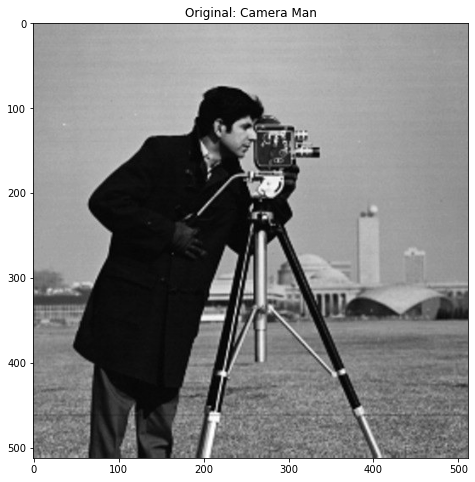

In [3]:
img = cv2.imread('filter1_img.jpg',0)
plt.figure(figsize=(10,8))
plt.title("Original: Camera Man")
plt.imshow(img,cmap = "gray")
plt.show()

## Apply filters
I apply all my filters. To save space, I just turned it into a list and called the name of the filter, the pad size and the title of the image. To apply the filter I simply convolve the filter with the image and display the new image.

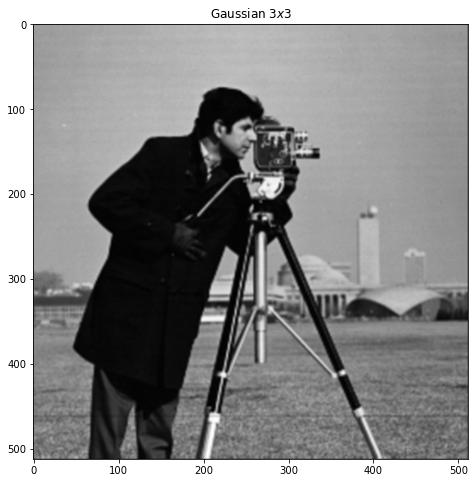

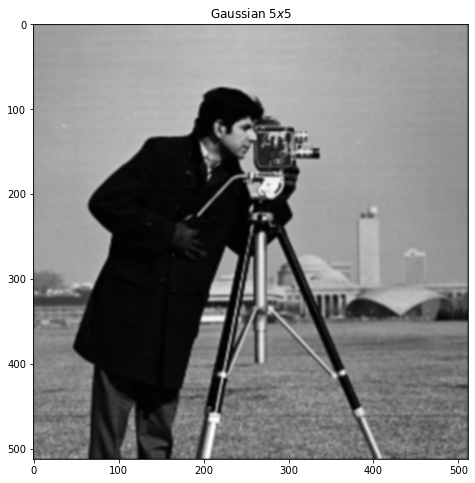

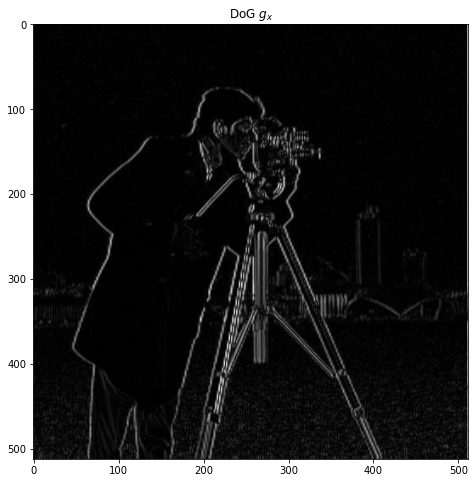

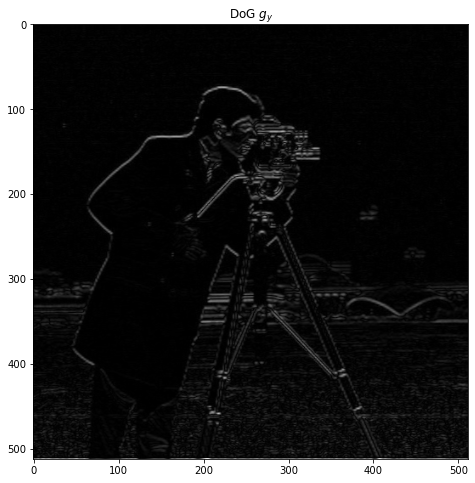

In [4]:
filters = [[gausBlur1,1,"Gaussian $3 x 3$"],[gausBlur2,2,"Gaussian $5 x 5$"],[gx,1,"DoG $g_x$"],[gy,1,"DoG $g_y$"]]

for i in filters:
    oout = myConv(img,i[0],i[1])
    plt.figure(figsize=(10,8))
    plt.title(i[2])
    plt.imshow(oout,cmap = "gray")
    plt.show()

# Sobel

The Sobel filter is just a quick preprossing step, where I add a gaussian blur, then I call my Sobel filter function and input the outputs of my applied DoG components. The exact same process is done for the next image.

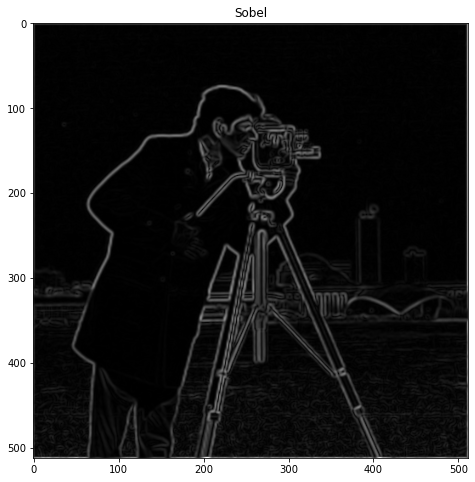

In [5]:
# preprocessing before appling sobel filter
sob_pp = myConv(img,gausBlur2,2)

#appling sobel filter
oout = sobelFilt(myConv(sob_pp,gx,1),myConv(sob_pp,gy,1))
plt.figure(figsize=(10,8))
plt.title("Sobel")
plt.imshow(oout,cmap = "gray")
plt.show()

# image 2

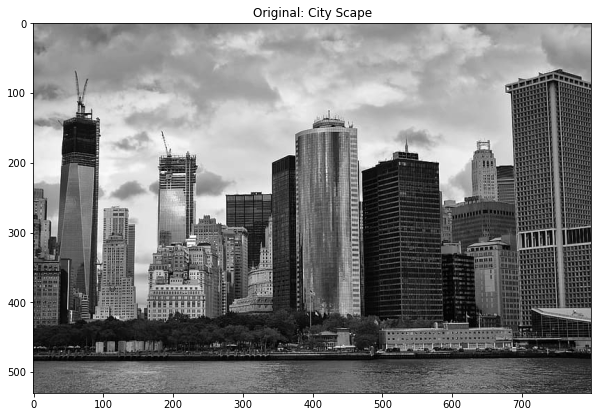

In [6]:
img = cv2.imread('filter2_img.jpg',0)
plt.figure(figsize=(10,8))
plt.title("Original: City Scape")
plt.imshow(img,cmap = "gray")
plt.show()

## Apply Filters

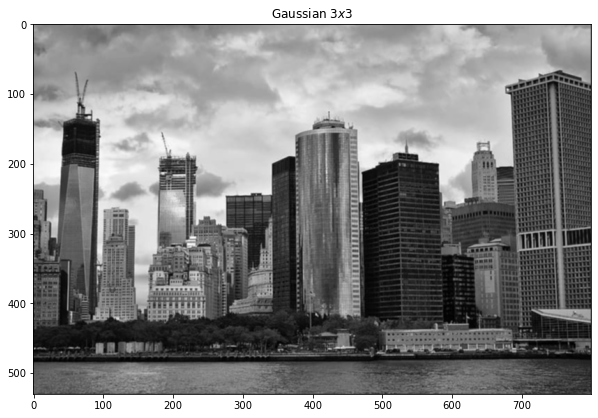

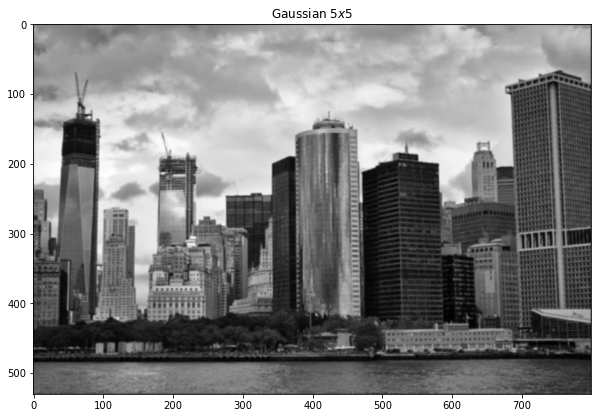

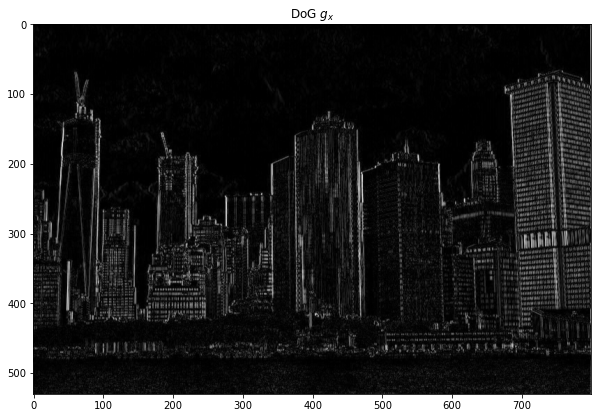

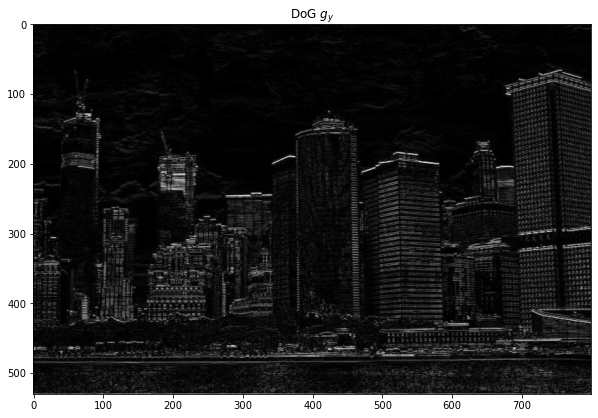

In [7]:
filters = [[gausBlur1,1,"Gaussian $3 x 3$"],[gausBlur2,2,"Gaussian $5 x 5$"],[gx,1,"DoG $g_x$"],[gy,1,"DoG $g_y$"]]

for i in filters:
    oout = myConv(img,i[0],i[1])
    plt.figure(figsize=(10,8))
    plt.title(i[2])
    plt.imshow(oout,cmap = "gray")
    plt.show()

## Sobel

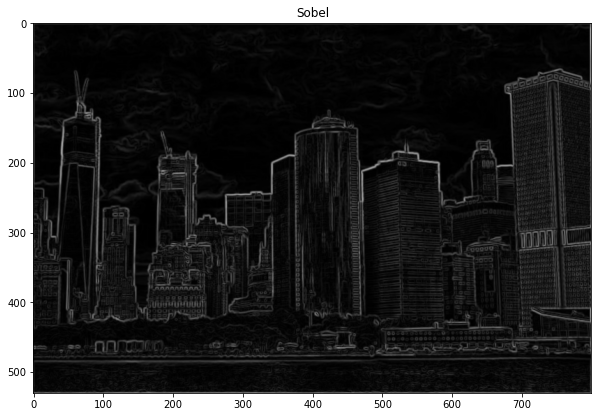

In [8]:
# preprocessing before appling sobel filter
sob_pp = myConv(img,gausBlur2,2)

#appling sobel filter

oout = sobelFilt(myConv(sob_pp,gx,1),myConv(sob_pp,gy,1))
plt.figure(figsize=(10,8))
plt.title("Sobel")
plt.imshow(oout,cmap = "gray")
plt.show()
